In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import scale


In [3]:
iris = load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

## Reading the dataset

In [7]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


## Visualizing the data

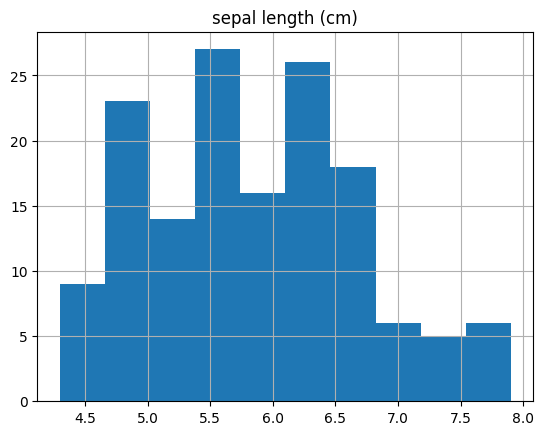

In [10]:
df.hist(column='sepal length (cm)')
plt.show()

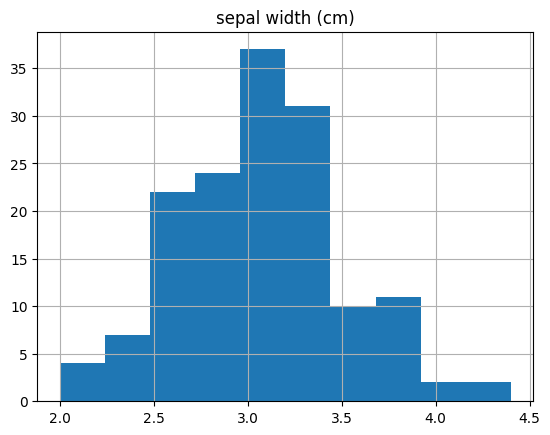

In [11]:
df.hist(column='sepal width (cm)')
plt.show()

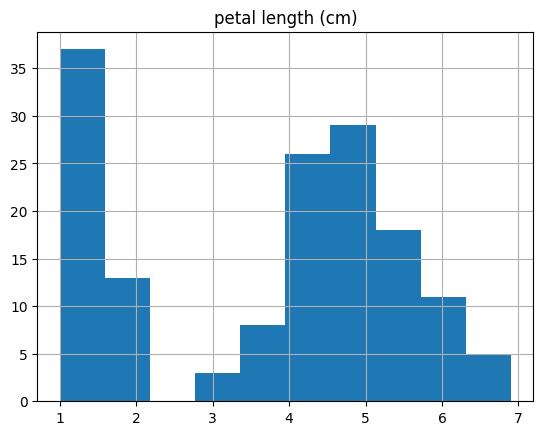

In [12]:
df.hist(column='petal length (cm)')
plt.show()

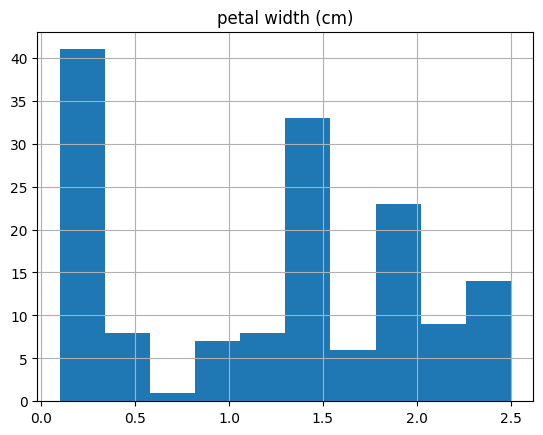

In [13]:
df.hist(column='petal width (cm)')
plt.show()

## Finding the optimum clusters(optimal_k)

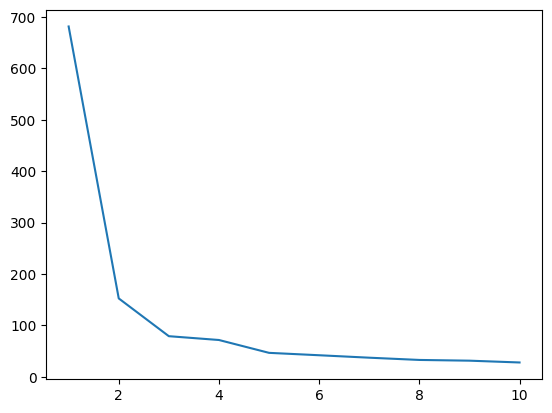

In [21]:
centroid_list = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init='k-means++',n_init='auto',max_iter=300,random_state=None)
    kmeans.fit(df.values)
    centroid_list.append(kmeans.inertia_)
plt.plot(range(1,11), centroid_list)
plt.show()

## Training and prediction

In [27]:
kmeans = KMeans(n_clusters = 3,n_init=10,random_state=None)
centroids = kmeans.fit_predict(df.values)

In [28]:
print(centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


## Plotting the predictions(clusters)

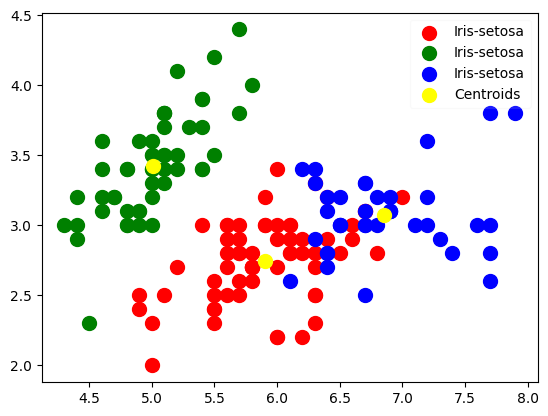

In [43]:

#scatter plot for the first 2 columns which are sepal length and sepal width
plt.scatter(df.values[centroids == 0, 0], df.values[centroids == 0, 1], s= 100, c='red', label='Iris-setosa')
plt.scatter(df.values[centroids == 1, 0], df.values[centroids == 1, 1], s= 100, c='green', label='Iris-setosa')
plt.scatter(df.values[centroids == 2, 0], df.values[centroids == 2, 1], s= 100, c='blue', label='Iris-setosa')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend(framealpha=0.1)